# CREDIT INSIGHT


In [67]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 

import math as m

In [68]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)


## Reading the Dataset 

In [69]:
df=pd.read_csv('Bank_personal_loan_modelling(1).csv')

## Exploratory Data Analysis (EDA)

In [70]:
df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [71]:
rows,columns=df.shape
print('rows:',rows)
print('columns:',columns)

rows: 5000
columns: 14


In [72]:
# Shifting target variable to the end. 

personal_loan=df['Personal Loan']
df.drop(['Personal Loan'],axis=1,inplace=True)
df['Personal Loan']=personal_loan

In [73]:
df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Securities Account  CD Account  Online  CreditCard  Personal Loan  
0                   1           0       0           0              0  
1                   1           0       0           0              0  
2                   0           0       0           0              0  
3                   0           0       0           0              0  
4                   0           0       0           1              0

In [74]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Personal Loan           int64
dtype: object

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  Personal Loan       5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## Checking presence of missing values

In [76]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64

In [77]:
df.isnull().values.any()

False

## Checking Unique Data 

In [78]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
Personal Loan            2
dtype: int64

In [79]:
dups=df.duplicated()
print('Number of duplicate rows=',(dups.sum()))
df[dups]

Number of duplicate rows= 0


Empty DataFrame
Columns: [ID, Age, Experience, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Securities Account, CD Account, Online, CreditCard, Personal Loan]
Index: []

## Summary Statistics of Data

In [80]:
df.describe().T

count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.104600    11.467954    -3.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.0      0.596800     0.490589     0.0      0.00   
CreditCard          5000.0      0.294000     0.455637     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIP Code            93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0  
Personal Loan           0.0      0.00      1.0

## Error Fixing 

In [81]:
any(df['Experience']<0)

True

In [82]:
df[df['Experience'] < 0]['Experience'].count()

52

In [83]:
df = df[df['Experience'] >= 0]


In [84]:
any(df['Experience']<0)

False

## Checking for unique value ( Categorical variables) 

In [85]:
cat=["Education","Online","CreditCard","CD Account","Securities Account","Family"]

for i in cat:
    df[i]=df[i].astype("object")

    
for column in df.columns:
    if df[column].dtype=="object":
        print(column.upper(),':',df[column].nunique()) 
        print(df[column].value_counts())
        print(df[column].value_counts(normalize=True)) 
        print('\n')

FAMILY : 4
Family
1    1470
2    1274
4    1203
3    1001
Name: count, dtype: int64
Family
1    0.297090
2    0.257478
4    0.243129
3    0.202304
Name: proportion, dtype: float64


EDUCATION : 3
Education
1    2080
3    1481
2    1387
Name: count, dtype: int64
Education
1    0.420372
3    0.299313
2    0.280315
Name: proportion, dtype: float64


SECURITIES ACCOUNT : 2
Securities Account
0    4432
1     516
Name: count, dtype: int64
Securities Account
0    0.895715
1    0.104285
Name: proportion, dtype: float64


CD ACCOUNT : 2
CD Account
0    4646
1     302
Name: count, dtype: int64
CD Account
0    0.938965
1    0.061035
Name: proportion, dtype: float64


ONLINE : 2
Online
1    2954
0    1994
Name: count, dtype: int64
Online
1    0.597009
0    0.402991
Name: proportion, dtype: float64


CREDITCARD : 2
CreditCard
0    3493
1    1455
Name: count, dtype: int64
CreditCard
0    0.705942
1    0.294058
Name: proportion, dtype: float64




### Numerical vs Categorical Variables 

In [86]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
        
print("Categorical :",cat)
print("Numerical: ",num)

Categorical : ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
Numerical:  ['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage', 'Personal Loan']


In [87]:
df[num].describe().T

count          mean          std     min       25%      50%  \
ID             4948.0   2501.268795  1443.277676     1.0   1254.75   2497.5   
Age            4948.0     45.557195    11.320735    24.0     36.00     46.0   
Experience     4948.0     20.331043    11.311973     0.0     10.75     20.0   
Income         4948.0     73.814470    46.112596     8.0     39.00     64.0   
ZIP Code       4948.0  93151.573363  2126.669017  9307.0  91911.00  93437.0   
CCAvg          4948.0      1.935926     1.747694     0.0      0.70      1.5   
Mortgage       4948.0     56.634398   101.828885     0.0      0.00      0.0   
Personal Loan  4948.0      0.097009     0.296000     0.0      0.00      0.0   

                    75%      max  
ID              3750.25   5000.0  
Age               55.00     67.0  
Experience        30.00     43.0  
Income            98.00    224.0  
ZIP Code       94608.00  96651.0  
CCAvg              2.60     10.0  
Mortgage         101.00    635.0  
Personal Loan      0.00      1.0

In [88]:
df[cat].describe().T

count  unique  top  freq
Family               4948       4    1  1470
Education            4948       3    1  2080
Securities Account   4948       2    0  4432
CD Account           4948       2    0  4646
Online               4948       2    1  2954
CreditCard           4948       2    0  3493

## Univariate Analysis (of Numerical Variables )

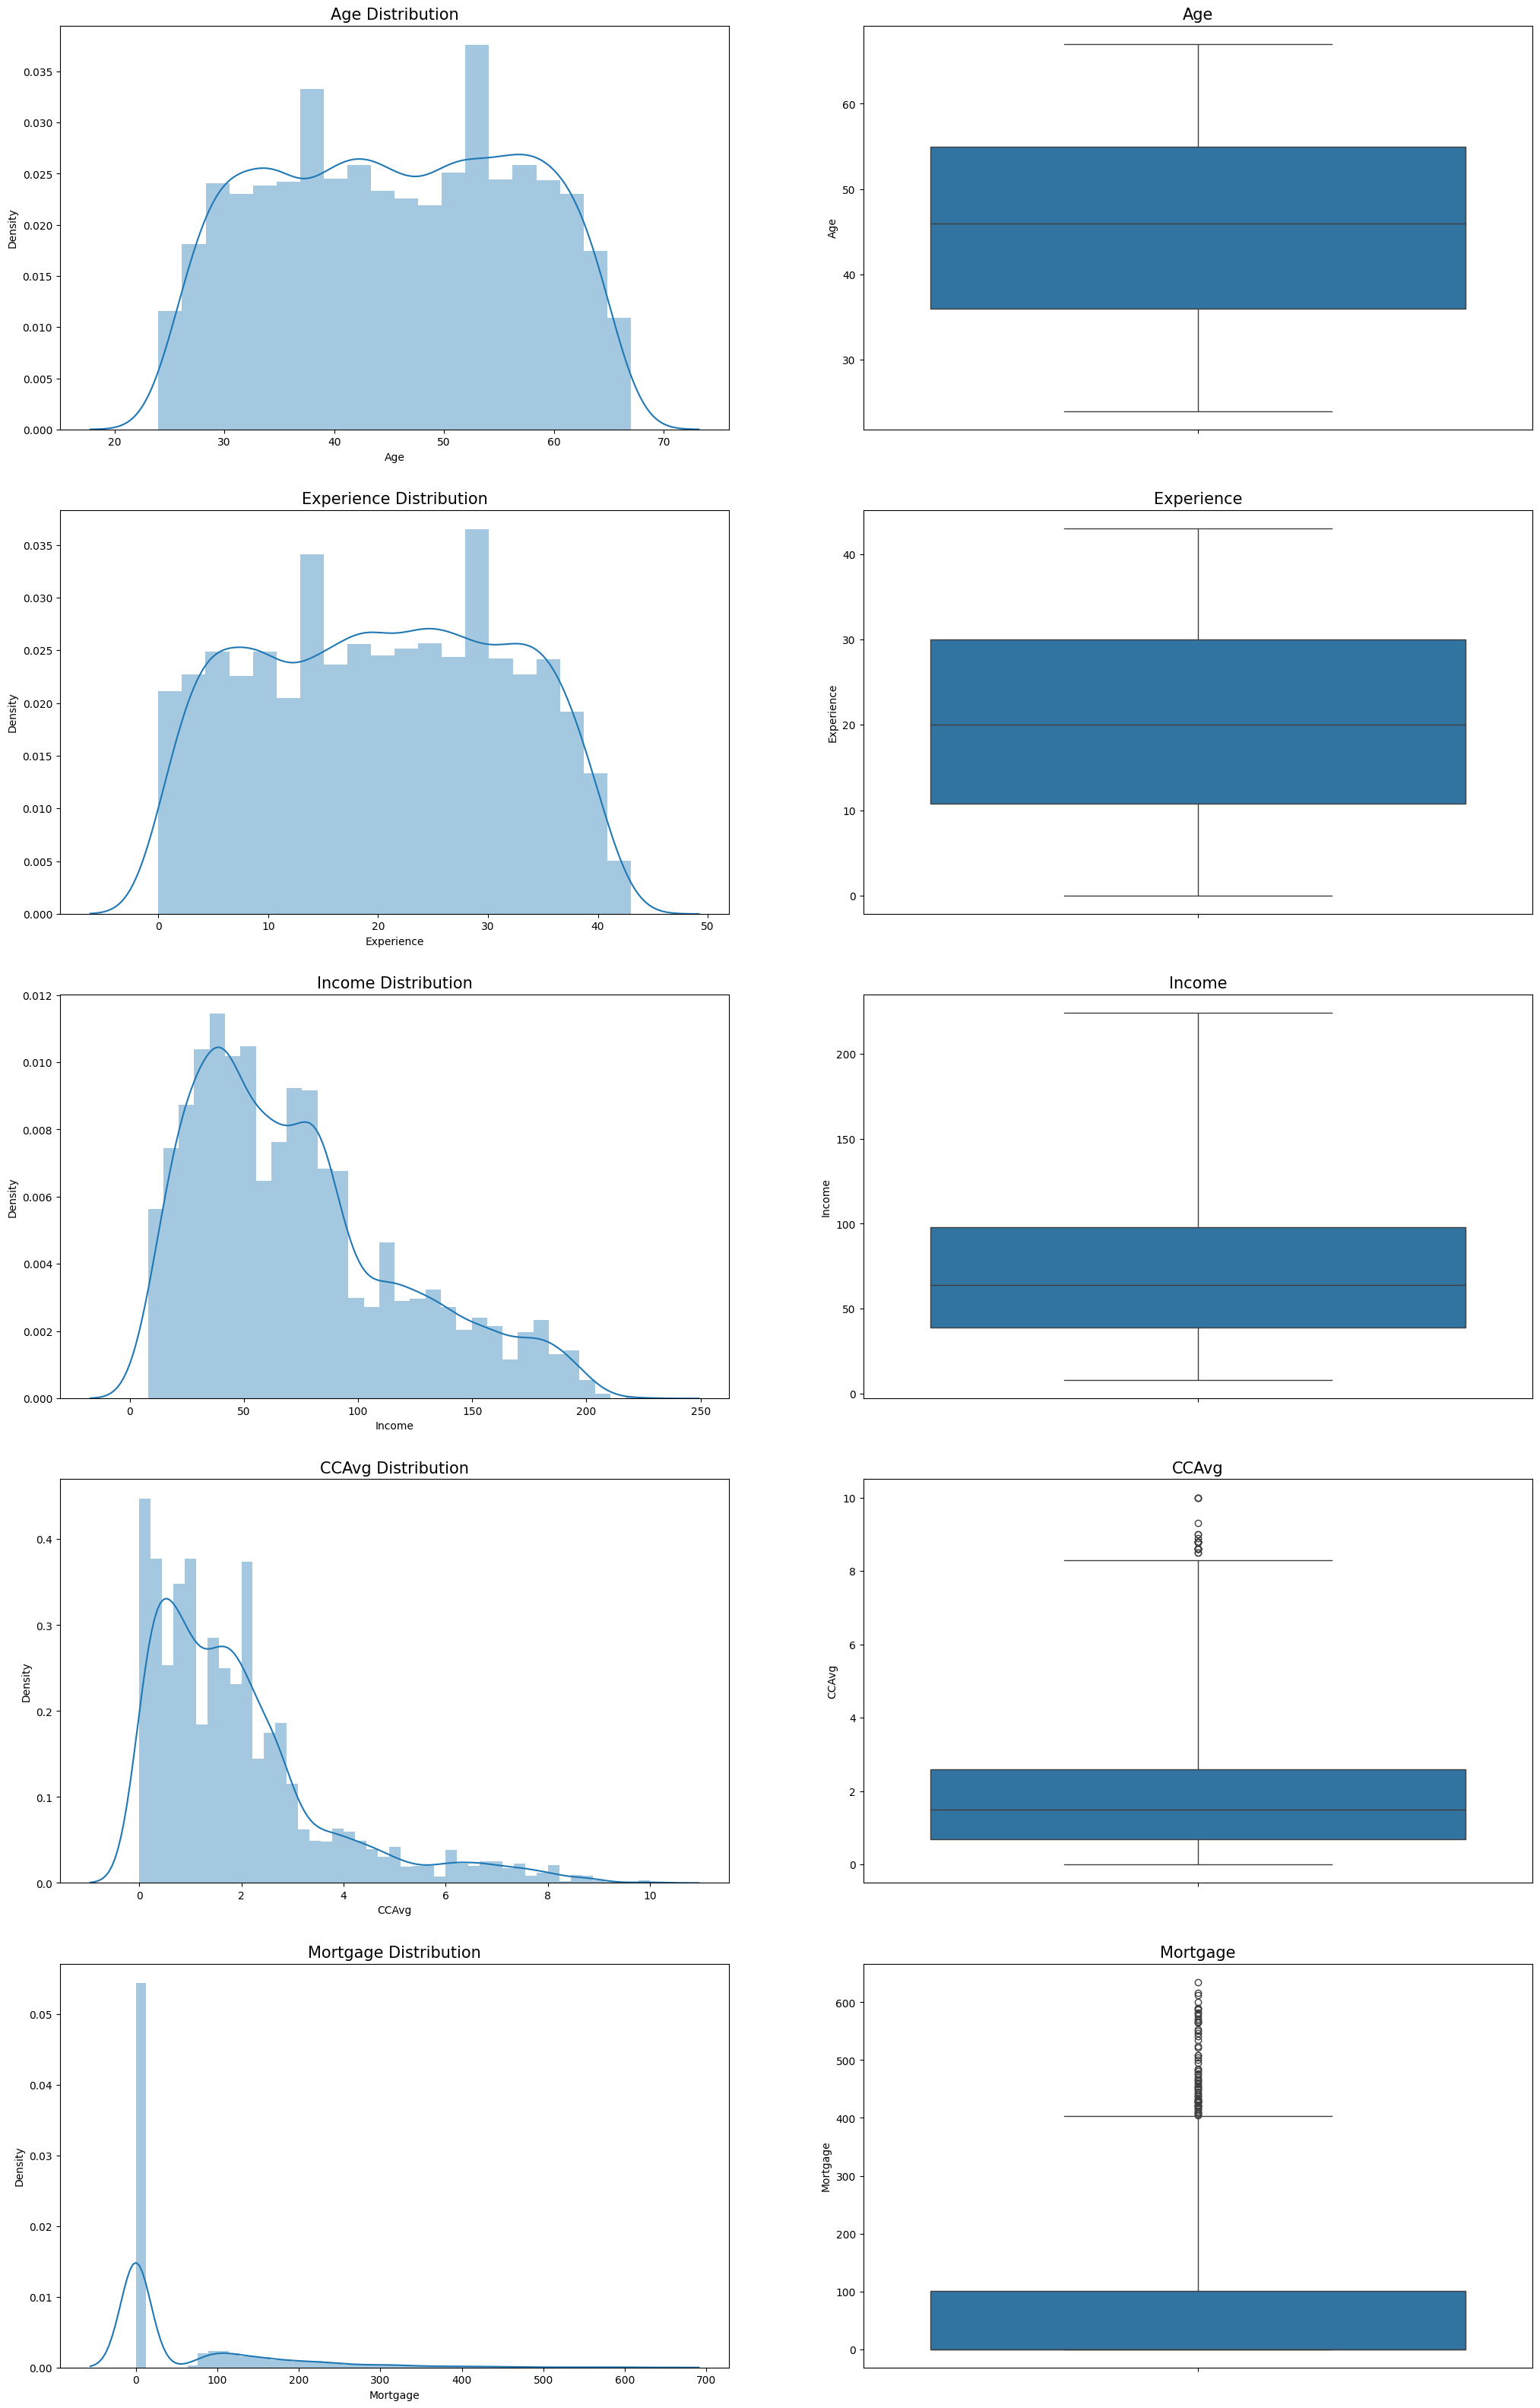

In [89]:
fig, axes=plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(25,40)

a=sns.distplot(df['Age'],ax=axes[0][0])
a.set_title("Age Distribution",fontsize=15)
a=sns.boxplot(df['Age'],orient = "v",ax=axes[0][1],whis=3)
a.set_title('Age',fontsize=15)


a=sns.distplot(df['Experience'],ax=axes[1][0])
a.set_title("Experience Distribution",fontsize=15)
a=sns.boxplot(df['Experience'],orient = "v",ax=axes[1][1],whis=3)
a.set_title('Experience',fontsize=15)

a=sns.distplot(df['Income'],ax=axes[2][0])
a.set_title("Income Distribution",fontsize=15)
a=sns.boxplot(df['Income'],orient = "v",ax=axes[2][1],whis=3)
a.set_title('Income',fontsize=15)

a=sns.distplot(df['CCAvg'],ax=axes[3][0])
a.set_title("CCAvg Distribution",fontsize=15)
a=sns.boxplot(df['CCAvg'],orient = "v",ax=axes[3][1],whis=3)
a.set_title('CCAvg',fontsize=15)

a=sns.distplot(df['Mortgage'],ax=axes[4][0])
a.set_title("Mortgage Distribution",fontsize=15)
a=sns.boxplot(df['Mortgage'],orient = "v",ax=axes[4][1],whis=3)
a.set_title('Mortgage',fontsize=15)


plt.show()

In [90]:
from scipy.stats import skew

In [91]:
print("Skewness of all features:")

for i in ('Age','Experience','Income','CCAvg','Mortgage'):
    column_skewness=df[i].skew()
    print(" ",i,":",column_skewness)

Skewness of all features:
  Age : -0.02246187692354869
  Experience : -0.01493964854377239
  Income : 0.8420039289292482
  CCAvg : 1.5946235307534944
  Mortgage : 2.104585411431956


In [92]:
df['Income']=np.log(df['Income'])
df['Income'].skew()

-0.4578043965746367

In [93]:
df['CCAvg']=np.log(df['CCAvg']+1)
df['CCAvg'].skew()

0.31912189273112035

In [94]:
df['Mortgage']=np.log(df['Mortgage']+1)
df['Mortgage'].skew()

0.8726073475695219

In [95]:
print("Skewness of all features:")

for i in ('Age','Experience','Income','CCAvg','Mortgage'):
    column_skewness=df[i].skew()
    print(" ",i,":",column_skewness)

Skewness of all features:
  Age : -0.02246187692354869
  Experience : -0.01493964854377239
  Income : -0.4578043965746367
  CCAvg : 0.31912189273112035
  Mortgage : 0.8726073475695219


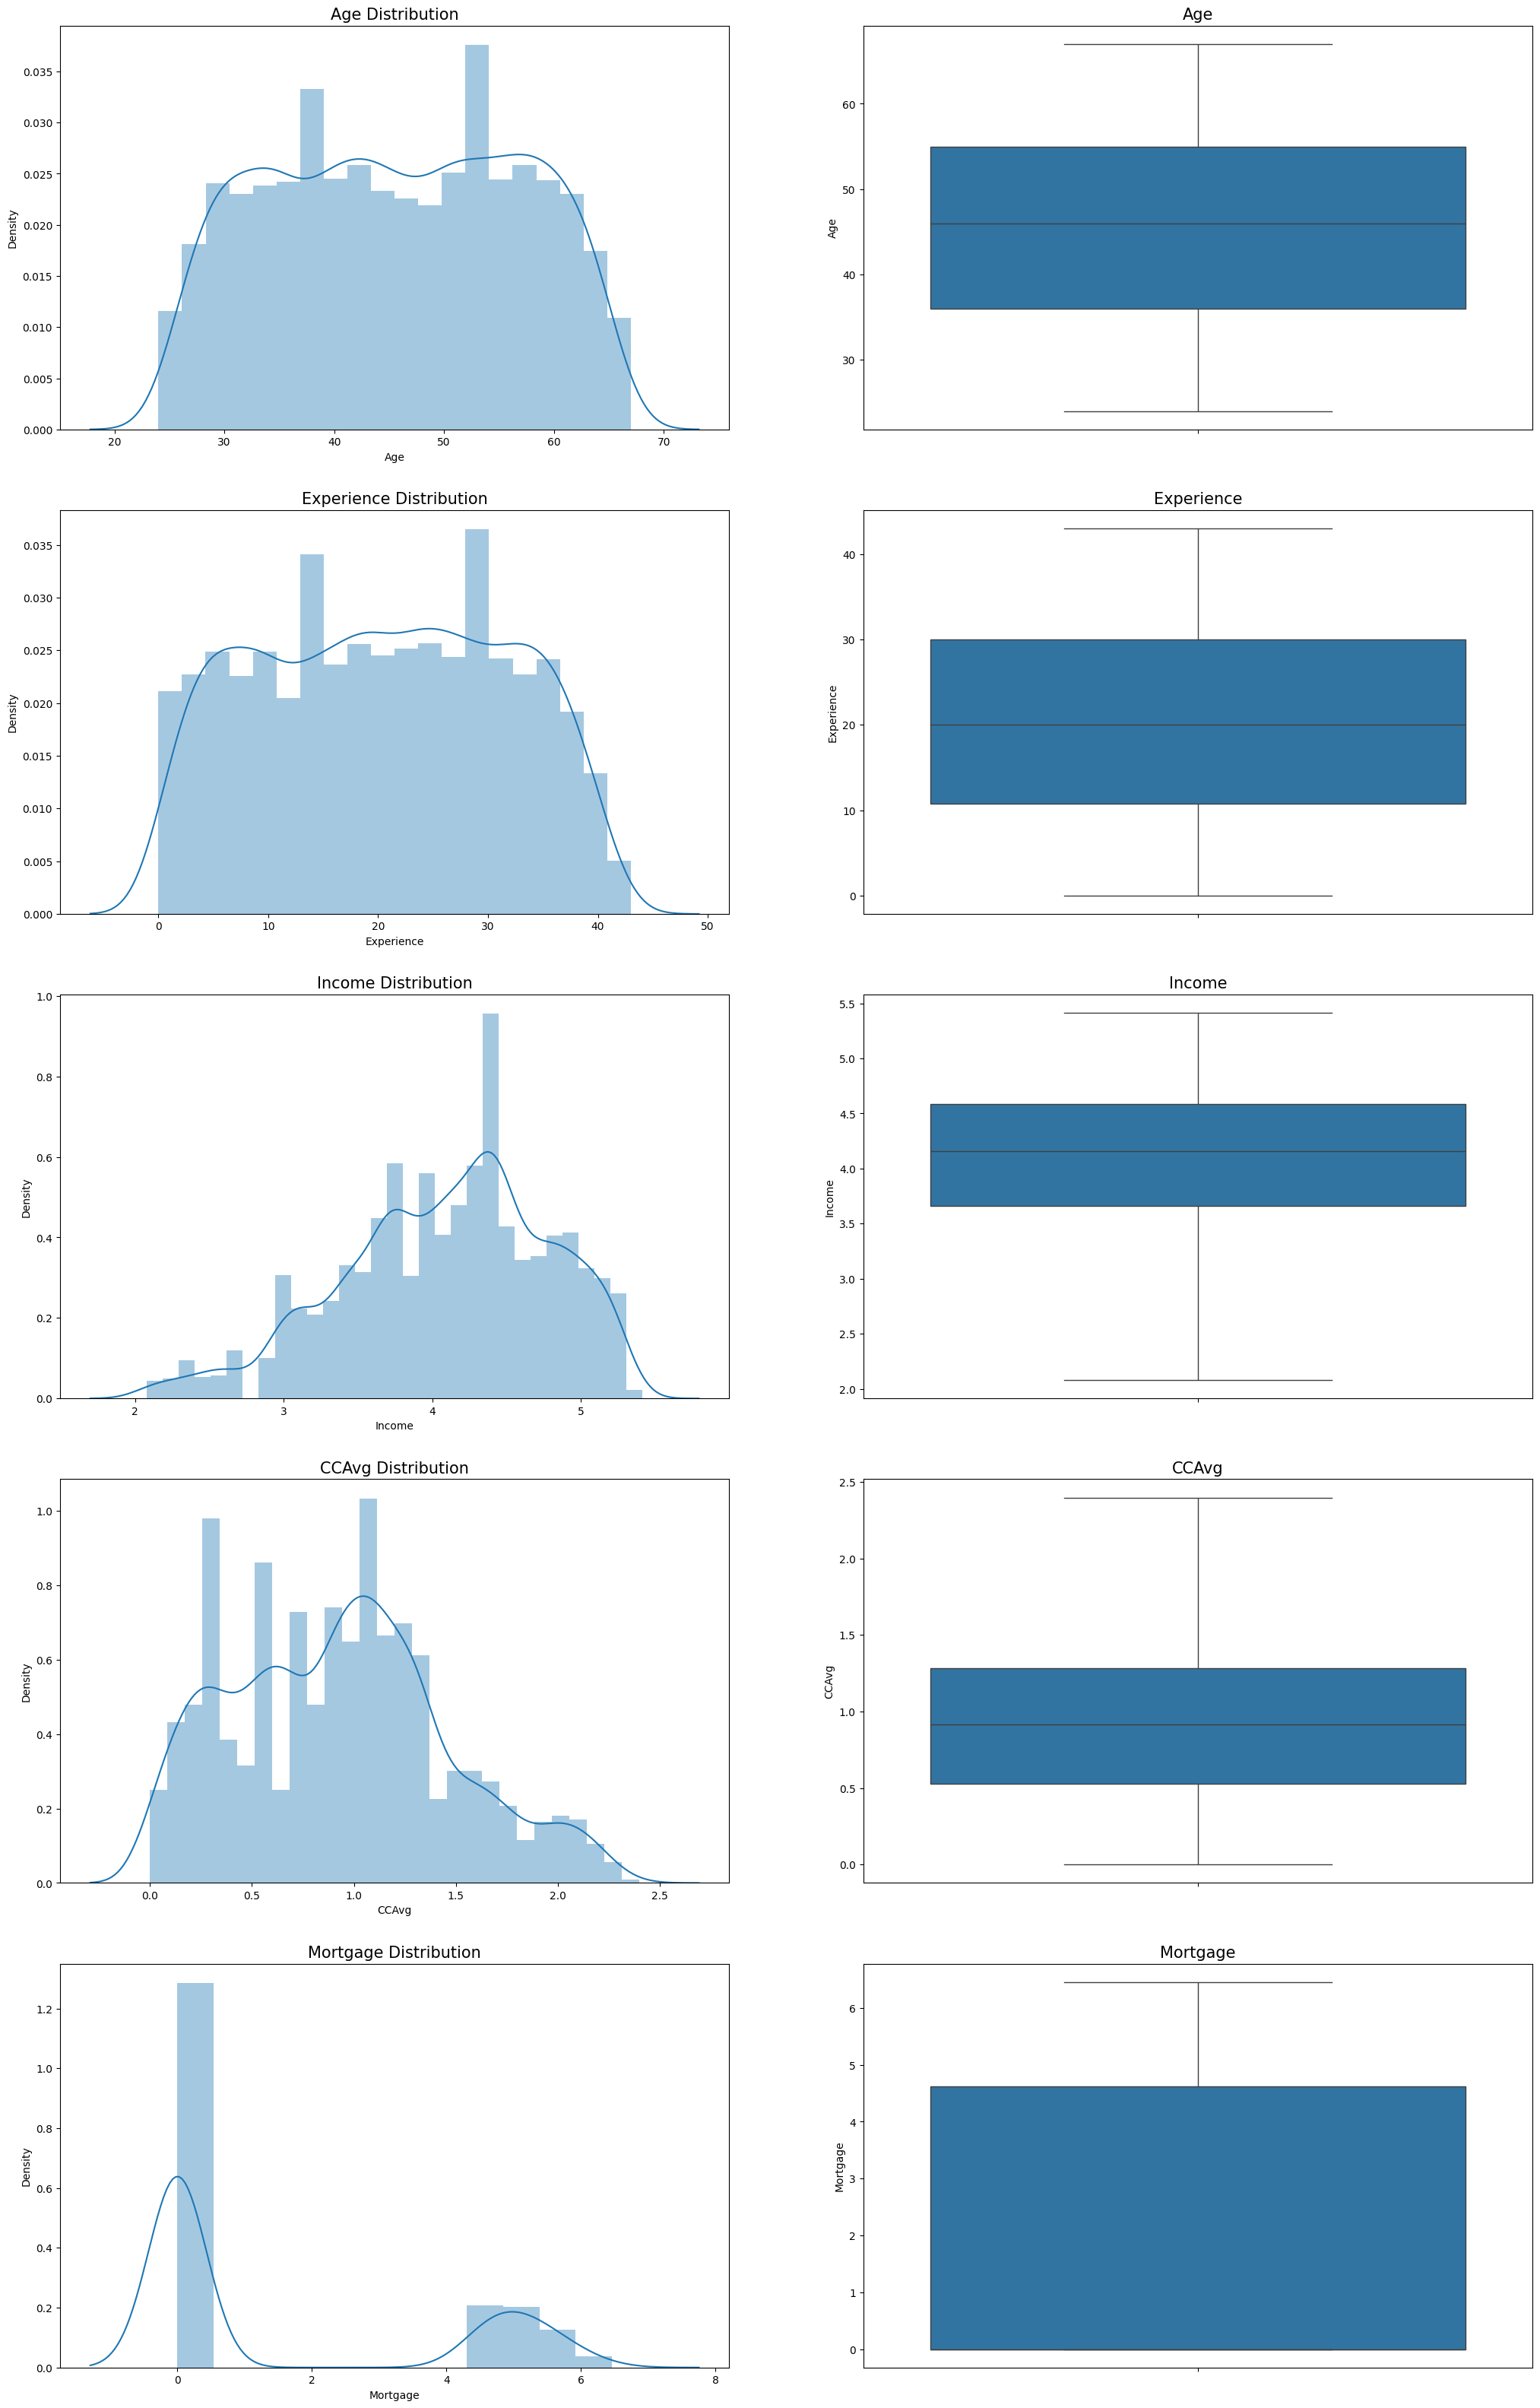

In [96]:
fig, axes=plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(25,40)

a=sns.distplot(df['Age'],ax=axes[0][0])
a.set_title("Age Distribution",fontsize=15)
a=sns.boxplot(df['Age'],orient = "v",ax=axes[0][1],whis=3)
a.set_title('Age',fontsize=15)


a=sns.distplot(df['Experience'],ax=axes[1][0])
a.set_title("Experience Distribution",fontsize=15)
a=sns.boxplot(df['Experience'],orient = "v",ax=axes[1][1],whis=3)
a.set_title('Experience',fontsize=15)

a=sns.distplot(df['Income'],ax=axes[2][0])
a.set_title("Income Distribution",fontsize=15)
a=sns.boxplot(df['Income'],orient = "v",ax=axes[2][1],whis=3)
a.set_title('Income',fontsize=15)

a=sns.distplot(df['CCAvg'],ax=axes[3][0])
a.set_title("CCAvg Distribution",fontsize=15)
a=sns.boxplot(df['CCAvg'],orient = "v",ax=axes[3][1],whis=3)
a.set_title('CCAvg',fontsize=15)

a=sns.distplot(df['Mortgage'],ax=axes[4][0])
a.set_title("Mortgage Distribution",fontsize=15)
a=sns.boxplot(df['Mortgage'],orient = "v",ax=axes[4][1],whis=3)
a.set_title('Mortgage',fontsize=15)


plt.show()

## Univariate Analysis (of Categorical Variables )

In [97]:
plt.figure(figsize=(30,45))


plt.subplot(6,2,1)
df['Family'].value_counts().plot(kind="bar", align='center',color = 'blue')
plt.xlabel('Number of Family Members')
plt.ylabel('Count')
plt.title("Family Members Distribution")



plt.subplot(6,2,2)
df['Education'].value_counts().plot(kind="bar", align='center',color = 'pink')
plt.xlabel('Level of Education')
plt.ylabel('Count ')
plt.title('Education Distribution')



plt.subplot(6,2,3)
df['Securities Account'].value_counts().plot(kind="bar", align='center',color = 'violet' )
plt.xlabel('Holding Securities Account')
plt.ylabel('Count')
plt.title('Securities Account Distribution')



plt.subplot(6,2,4)
df['CD Account'].value_counts().plot(kind="bar", align='center',color = 'yellow')
plt.xlabel('Holding CD Account')
plt.ylabel('Count')
plt.title("CD Account Distribution")



plt.subplot(6,2,5)
df['Online'].value_counts().plot(kind="bar", align='center',color = 'green')
plt.xlabel('Accessing Online Banking Facilities')
plt.ylabel('Count')
plt.title("Online Banking Distribution")



plt.subplot(6,2,6)
df['CreditCard'].value_counts().plot(kind="bar", align='center',color = 'lightblue') 
plt.xlabel('Holding Credit Card')
plt.ylabel('Count')
plt.title("CreditCard Distribution")


plt.show()

## Outliers Detection 

In [98]:
plt.figure(figsize=(10,10))
a= sns.boxplot(data=df[['Age','Mortgage','CCAvg','Income','Experience']],orient = "v")
plt.show()

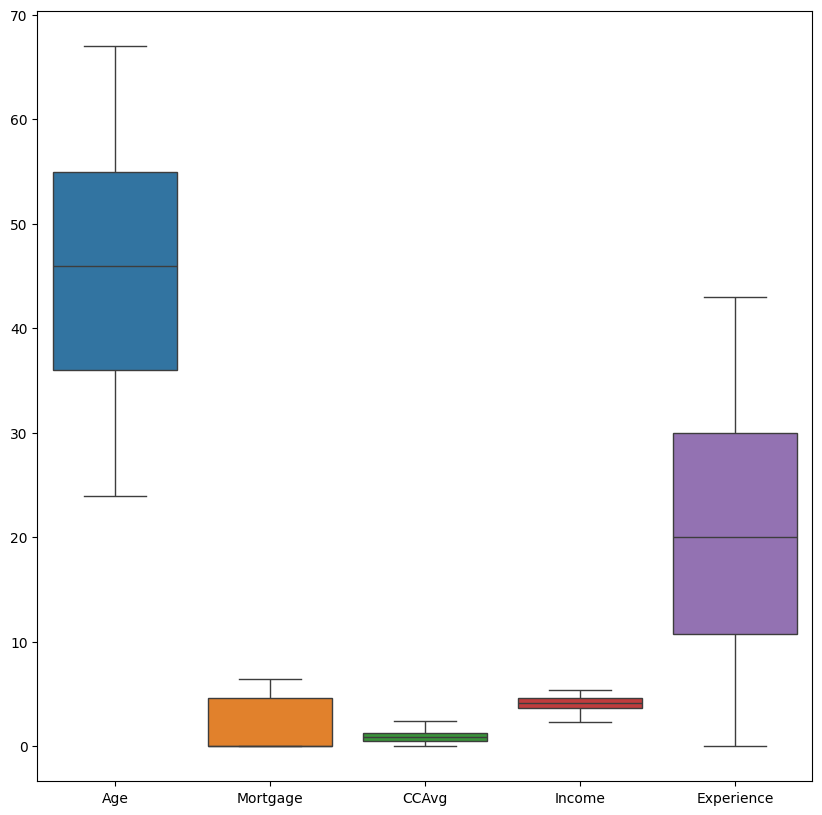

In [99]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range, upper_range


for column in ['Income']:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])
    
    
plt.figure(figsize=(10,10))

a= sns.boxplot(data=df[['Age','Mortgage','CCAvg','Income','Experience']],orient = "v")
plt.show()

In [100]:
df.rename(columns ={"ZIP Code":"ZIP_Code","Securities Account":"Securities_Account"})

ID  Age  Experience    Income  ZIP_Code Family     CCAvg Education  \
0        1   25           1  3.891820     91107      4  0.955511         1   
1        2   45          19  3.526361     90089      3  0.916291         1   
2        3   39          15  2.397895     94720      1  0.693147         1   
3        4   35           9  4.605170     94112      1  1.308333         2   
4        5   35           8  3.806662     91330      4  0.693147         2   
...    ...  ...         ...       ...       ...    ...       ...       ...   
4995  4996   29           3  3.688879     92697      1  1.064711         3   
4996  4997   30           4  2.708050     92037      4  0.336472         1   
4997  4998   63          39  3.178054     93023      2  0.262364         3   
4998  4999   65          40  3.891820     90034      3  0.405465         2   
4999  5000   28           4  4.418841     92612      3  0.587787         1   

      Mortgage Securities_Account CD Account Online CreditCard  Personal Loan  
0     0.000000                  1          0      0          0              0  
1     0.000000                  1          0      0          0              0  
2     0.000000                  0          0      0          0              0  
3     0.000000                  0          0      0          0              0  
4     0.000000                  0          0      0          1              0  
...        ...                ...        ...    ...        ...            ...  
4995  0.000000                  0          0      1          0              0  
4996  4.454347                  0          0      1          0              0  
4997  0.000000                  0          0      0          0              0  
4998  0.000000                  0          0      1          0              0  
4999  0.000000                  0          0      1          1              0  

[4948 rows x 14 columns]

In [101]:
loan_counts = pd.DataFrame(df["Personal Loan"].value_counts()).reset_index()
loan_counts.columns =["Labels","Personal Loan"]
loan_counts

Labels  Personal Loan
0       0           4468
1       1            480

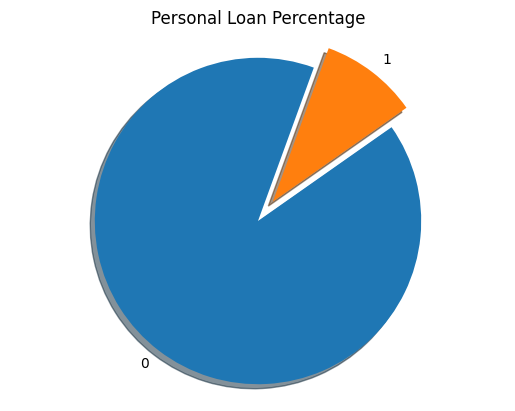

In [102]:
fig1, ax1 = plt.subplots()

explode = (0, 0.15)
ax1.pie(loan_counts["Personal Loan"], explode=explode, labels=loan_counts["Labels"],shadow=True,startangle=70)
ax1.axis('equal')

plt.title("Personal Loan Percentage")
plt.show()

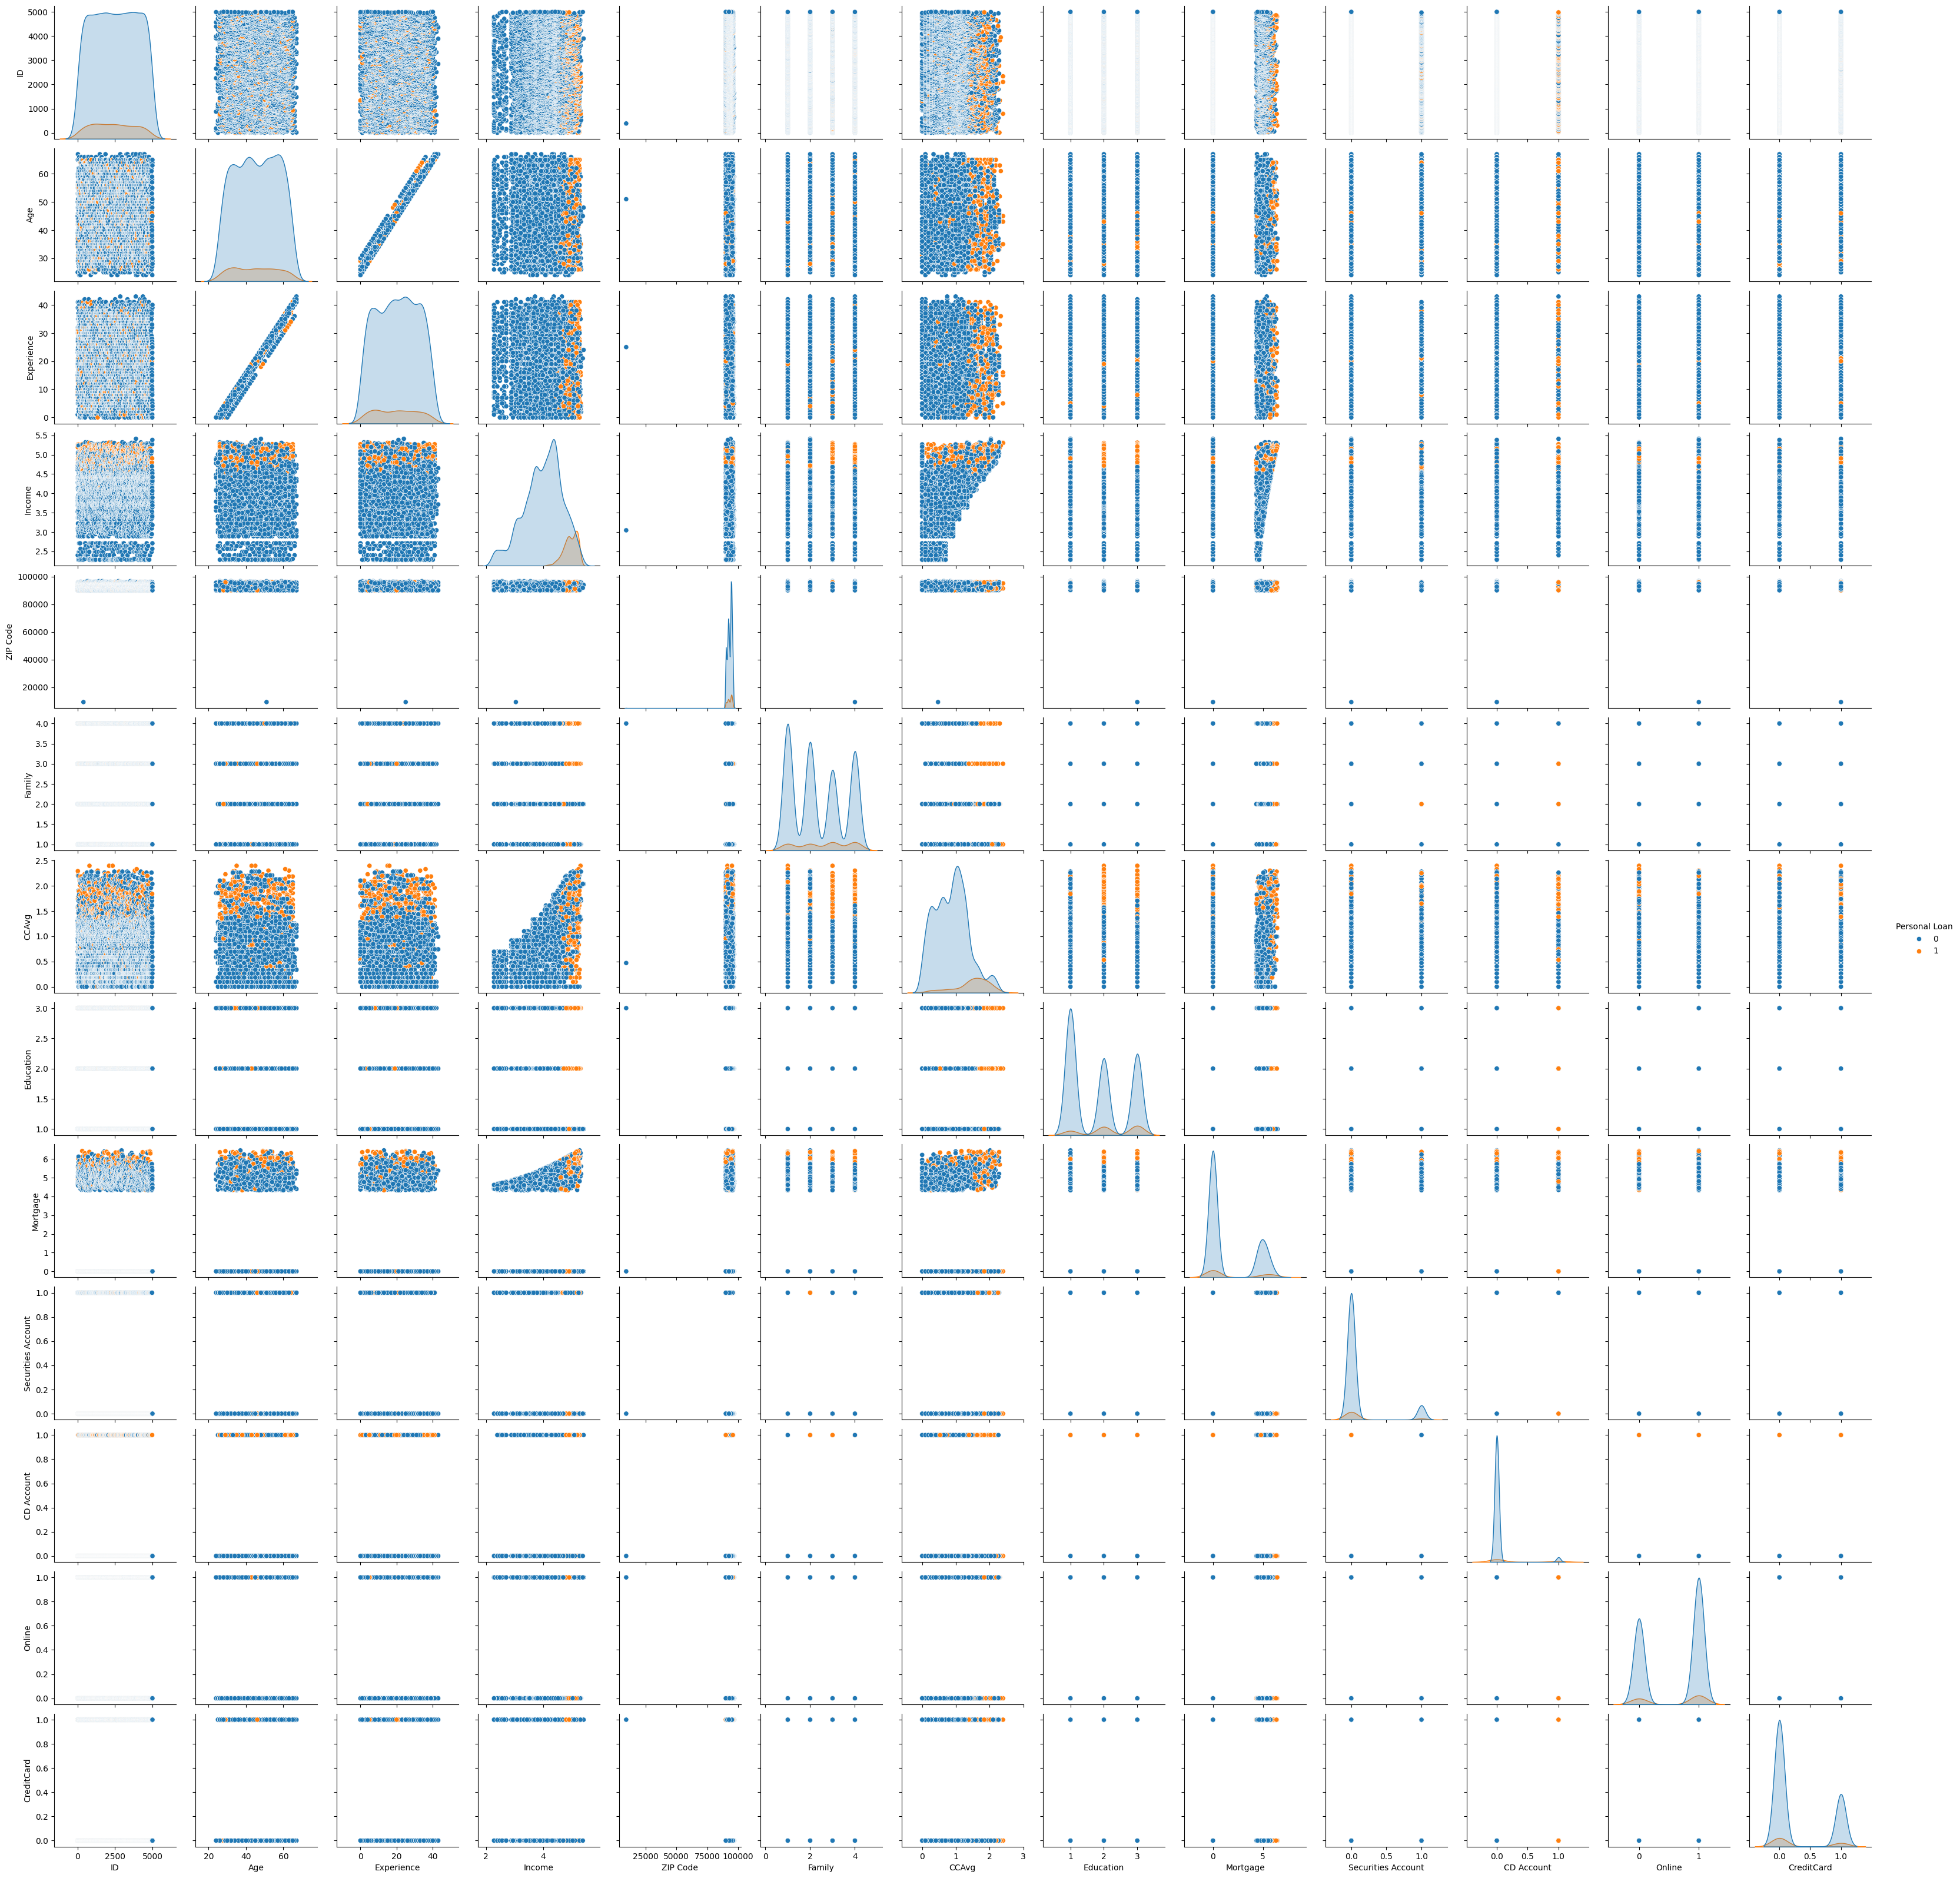

In [103]:
sns.pairplot(df,hue='Personal Loan')

## Bivariate Analysis 

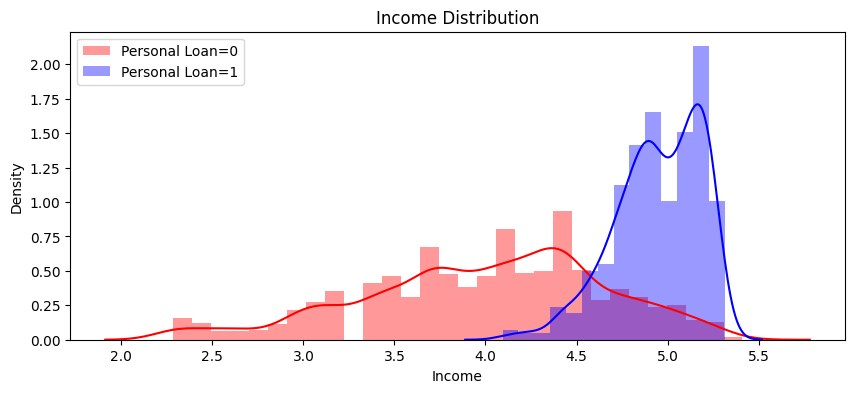

In [104]:
plt.figure(figsize=(10,4))
sns.distplot(df[df["Personal Loan"] == 0]['Income'], color = 'r',label='Personal Loan=0')
sns.distplot(df[df["Personal Loan"] == 1]['Income'], color = 'b',label='Personal Loan=1')
plt.legend()
plt.title("Income Distribution")

plt.show()

## Correlation using Heatmap 

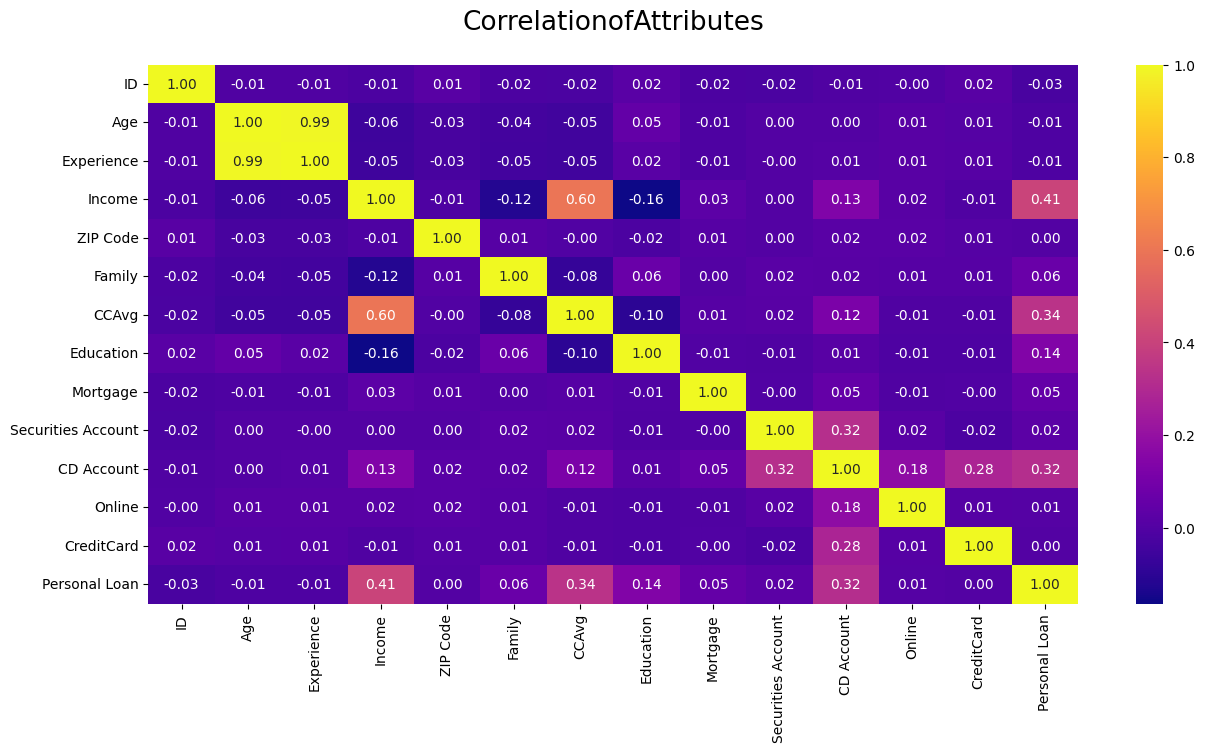

In [105]:
plt.figure(figsize =(15,7))
plt.title('CorrelationofAttributes', y=1.05, size=19)
sns.heatmap(df.corr(), cmap='plasma',annot=True, fmt='.2f')

plt.show()

## Train-Test Data 

In [106]:
df.drop(['ID', 'ZIP Code', 'Experience'], axis=1, inplace=True)

In [107]:
X=df.drop('Personal Loan',axis=1)
y=df['Personal Loan']

In [108]:
X.head()

Age    Income Family     CCAvg Education  Mortgage Securities Account  \
0   25  3.891820      4  0.955511         1       0.0                  1   
1   45  3.526361      3  0.916291         1       0.0                  1   
2   39  2.397895      1  0.693147         1       0.0                  0   
3   35  4.605170      1  1.308333         2       0.0                  0   
4   35  3.806662      4  0.693147         2       0.0                  0   

  CD Account Online CreditCard  
0          0      0          0  
1          0      0          0  
2          0      0          0  
3          0      0          0  
4          0      0          1

In [109]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

In [110]:
# Split X and y into training and test set in 70:30 ratio

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=1)

## Standardization 

In [111]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
print(scaler)

StandardScaler()


In [112]:
scaler.mean_

array([45.48888247,  4.08809109,  2.38001733,  0.94069763,  1.87583021,
        1.59246159,  0.10568871,  0.05544326,  0.59370488,  0.29742997])

In [113]:
scaler.scale_

array([11.27522131,  0.6977602 ,  1.14396774,  0.53489031,  0.83847127,
        2.37770211,  0.30743878,  0.2288434 ,  0.49114091,  0.45712732])

In [114]:
X_train_Scaled=scaler.fit_transform(X_train)
print(X_train_Scaled)

[[-0.39811923 -0.76350447 -0.33219234 ... -0.24227597 -1.20882799
  -0.65065019]
 [-0.84156951 -1.24572204  1.4161087  ... -0.24227597 -1.20882799
  -0.65065019]
 [-0.22073912  1.74159232 -1.20634286 ... -0.24227597 -1.20882799
   1.53692418]
 ...
 [-1.28501979  0.60589356  0.54195818 ... -0.24227597  0.82724756
   1.53692418]
 [-0.39811923  0.45664421  0.54195818 ... -0.24227597  0.82724756
  -0.65065019]
 [ 1.46437192  0.47401602 -1.20634286 ... -0.24227597  0.82724756
  -0.65065019]]


In [115]:
print(X_train_Scaled.mean(axis=0))

[-1.69274547e-16  4.10362539e-17  1.64145015e-16 -1.19005136e-16
 -1.12849698e-16  7.95077419e-17  3.69326285e-17  2.15440333e-17
 -7.74559292e-17 -1.53885952e-18]


In [116]:
print(X_train_Scaled.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [117]:
scaler=StandardScaler().fit(X_test)

In [118]:
scaler.mean_

array([45.71649832,  4.08435806,  2.41818182,  0.89949739,  1.88619529,
        1.52095738,  0.1010101 ,  0.07407407,  0.6047138 ,  0.28619529])

In [119]:
scaler.scale_

array([11.42080463,  0.68232701,  1.15799347,  0.53039752,  0.84238199,
        2.34372712,  0.3013421 ,  0.2618914 ,  0.48891208,  0.4519818 ])

In [120]:
X_test_Scaled=scaler.transform(X_test)
print(X_test_Scaled)

[[ 1.07553733 -1.39062918  0.5024365  ... -0.28284271 -1.23685594
  -0.63320091]
 [ 1.16309683  0.32199668  1.36599922 ... -0.28284271 -1.23685594
  -0.63320091]
 [ 0.46262079 -0.19508878  1.36599922 ... -0.28284271  0.8085016
  -0.63320091]
 ...
 [ 0.6377398   0.13194437 -1.22468896 ... -0.28284271  0.8085016
   1.57927757]
 [-1.28856931  1.12507961 -1.22468896 ... -0.28284271 -1.23685594
  -0.63320091]
 [-0.93833129  0.32199668  1.36599922 ... -0.28284271  0.8085016
  -0.63320091]]


In [121]:
print(X_test_Scaled.mean(axis=0))

[-5.14365953e-17  3.25366371e-16  1.93784382e-16 -1.77037584e-16
  2.39239978e-18 -7.65567931e-17 -6.69871939e-17  3.58859968e-17
 -6.93795937e-17  8.85187920e-17]


In [122]:
print(X_test_Scaled.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Base Function 

In [123]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix


In [124]:
from sklearn.metrics import precision_score, recall_score, f1_score


def model_performance_report(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    y_train_predict=model.predict(X_train)
    
    
    print("RESULTS ON TRAINING DATA :")
    print('')
    print ("Accuracy on training set: ",end=" ")
    print (model.score(X_train, y_train))
    print('')
    
    print ("Classification Report:")
    print('')
    print(metrics.classification_report(y_train,y_train_predict))
    print('')
    
    print ("Confusion Matrix: ")
    print(metrics.confusion_matrix(y_train,y_train_predict))
    tn, fp, fn, tp = confusion_matrix(y_train, y_train_predict).ravel()
    
    specificity1 = tn / (tn+fp)
    print('')
    print('Train_Specificity : ', specificity1)
    
    print('')
    print('')
    print('')
    
    
    
    print("RESULTS ON TESTING DATA: ")
    print('')
    print ("Accuracy on testing set:",end=" ") 
    print (model.score(X_test, y_test))
    print('')
    y_pred = model.predict(X_test)
    
    
    print ("Classification Report:")
    print (metrics.classification_report(y_test, y_pred))
    print('')
    
    print ("Confusion Matrix:")
    print (metrics.confusion_matrix(y_test, y_pred))
    print('')
    tn, fp, fn, tp = confusion_matrix(y_train, y_train_predict).ravel()
    
    specificity2 = tn / (tn+fp)
    print('')
    print('Test_Specificity : ', specificity2) 

## Naive-Bayes Model 

In [125]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
NB_model = GaussianNB()

In [126]:
model_performance_report(NB_model,X_train_Scaled,X_test_Scaled,y_train,y_test)


RESULTS ON TRAINING DATA :

Accuracy on training set:  0.919434016748484

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      3128
           1       0.60      0.52      0.56       335

    accuracy                           0.92      3463
   macro avg       0.77      0.74      0.76      3463
weighted avg       0.92      0.92      0.92      3463


Confusion Matrix: 
[[3009  119]
 [ 160  175]]

Train_Specificity :  0.9619565217391305



RESULTS ON TESTING DATA: 

Accuracy on testing set: 0.9158249158249159

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1340
           1       0.57      0.57      0.57       145

    accuracy                           0.92      1485
   macro avg       0.76      0.76      0.76      1485
weighted avg       0.92      0.92      0.92      1485


Confusion Matrix:
[[1277   63]
 [  62   83]]


Test_Specifici

## SVM (Support Vector Machine) Model 

In [127]:
from sklearn.svm import SVC

# svm_model=SVC(kernel='rbf', gamma='scale', class_weight='balanced')   #Radial Basis Function   --> Precision=1

svm_model=SVC(kernel='sigmoid', gamma='scale', class_weight='balanced')

# 1 / (n_features * X.var())

In [128]:
model_performance_report(svm_model,X_train_Scaled,X_test_Scaled,y_train,y_test)

RESULTS ON TRAINING DATA :

Accuracy on training set:  0.8076812012705746

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      3128
           1       0.31      0.81      0.45       335

    accuracy                           0.81      3463
   macro avg       0.64      0.81      0.67      3463
weighted avg       0.91      0.81      0.84      3463


Confusion Matrix: 
[[2527  601]
 [  65  270]]

Train_Specificity :  0.8078644501278772



RESULTS ON TESTING DATA: 

Accuracy on testing set: 0.8188552188552188

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      1340
           1       0.32      0.79      0.46       145

    accuracy                           0.82      1485
   macro avg       0.65      0.81      0.68      1485
weighted avg       0.91      0.82      0.85      1485


Confusion Matrix:
[[1101  239]
 [  30  115]]


Test_Specific

## KNN(K-Nearest Neighbour) Model 

In [129]:
from sklearn.neighbors import KNeighborsClassifier

### Under Sampling

In [130]:
from imblearn.under_sampling import RandomUnderSampler        # for handling imbalanced datasets
from collections import Counter

desired_ratio = 1


undersampler = RandomUnderSampler(sampling_strategy=desired_ratio, random_state=1)
print(Counter(y_train))


X_undersampled, y_undersampled = undersampler.fit_resample(X_train_Scaled, y_train)
print(Counter(y_undersampled))

Counter({0: 3128, 1: 335})
Counter({0: 335, 1: 335})


### Hyperparameter tuning

In [131]:
from sklearn.model_selection import  GridSearchCV        
knn_model = KNeighborsClassifier()


param_grid = {
    'n_neighbors': [5, 10, 15, 20],  
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean']         }


grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='recall')         # 5-fold cross-validation
grid_search.fit(X_undersampled, y_undersampled)


best_params = grid_search.best_params_
print(best_params)

best_knn_model = grid_search.best_estimator_
print(best_knn_model)

# Train the best model on training data
best_knn_model.fit(X_undersampled, y_undersampled)

{'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'uniform'}
KNeighborsClassifier(metric='euclidean', n_neighbors=15)


KNeighborsClassifier(metric='euclidean', n_neighbors=15)

In [132]:
model_performance_report(knn_model,X_undersampled,X_test_Scaled,y_undersampled,y_test)

RESULTS ON TRAINING DATA :

Accuracy on training set:  0.9373134328358209

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       335
           1       0.95      0.92      0.94       335

    accuracy                           0.94       670
   macro avg       0.94      0.94      0.94       670
weighted avg       0.94      0.94      0.94       670


Confusion Matrix: 
[[320  15]
 [ 27 308]]

Train_Specificity :  0.9552238805970149



RESULTS ON TESTING DATA: 

Accuracy on testing set: 0.8686868686868687

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1340
           1       0.42      0.91      0.58       145

    accuracy                           0.87      1485
   macro avg       0.70      0.89      0.75      1485
weighted avg       0.93      0.87      0.89      1485


Confusion Matrix:
[[1158  182]
 [  13  132]]


Test_Specificity 